# Predição de Valores de Carros Usados

## *Introdução*

Este projeto utiliza Machine Learning para prever os preços de carros usados com base em características como marca, ano de fabricação, tipo de combustível e quilometragem.
O Objetivo do projeto é auxiliar consumidores e vendedores a entenderem a dinâmica dos preços e a tomarem decisões informadas sobre compra e venda de carros usados nos Estados Unidos.


Os dados foram extraídos de um dataset contendo informações detalhadas sobre veículos.

---


## Ferramentas Utilizadas

- **Linguagem**: Python
- **Bibliotecas**:
  - Manipulação de Dados: `pandas`, `numpy`
  - Visualização: `matplotlib`, `seaborn`
  - Modelagem: `scikit-learn`

## Exploração dos dados

Inicialmente, vamos carregar algumas bibliotecas necessárias e o dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

import pandas as pd
from google.colab import drive

import os
os.environ["JOBLIB_MULTIPROCESSING"] = "0"

# carregando o dataset
# Montando o Google Drive
drive.mount('/content/drive')

# Definindo o caminho base (substitua pelo caminho da pasta onde o CSV está)
file_path = '/content/drive/MyDrive/Faculdade/8s/ML/data'

# Função para carregar o arquivo CSV
def load_data(car_path=file_path):
    # Caminho completo do arquivo CSV
    csv_path = os.path.join(car_path, "car_price_prediction.csv")  # Nome do seu arquivo CSV
    return pd.read_csv(csv_path)

# Carregando os dados
df = load_data()





Mounted at /content/drive


Informações iniciais do dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [3]:
df.shape

(19237, 18)

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


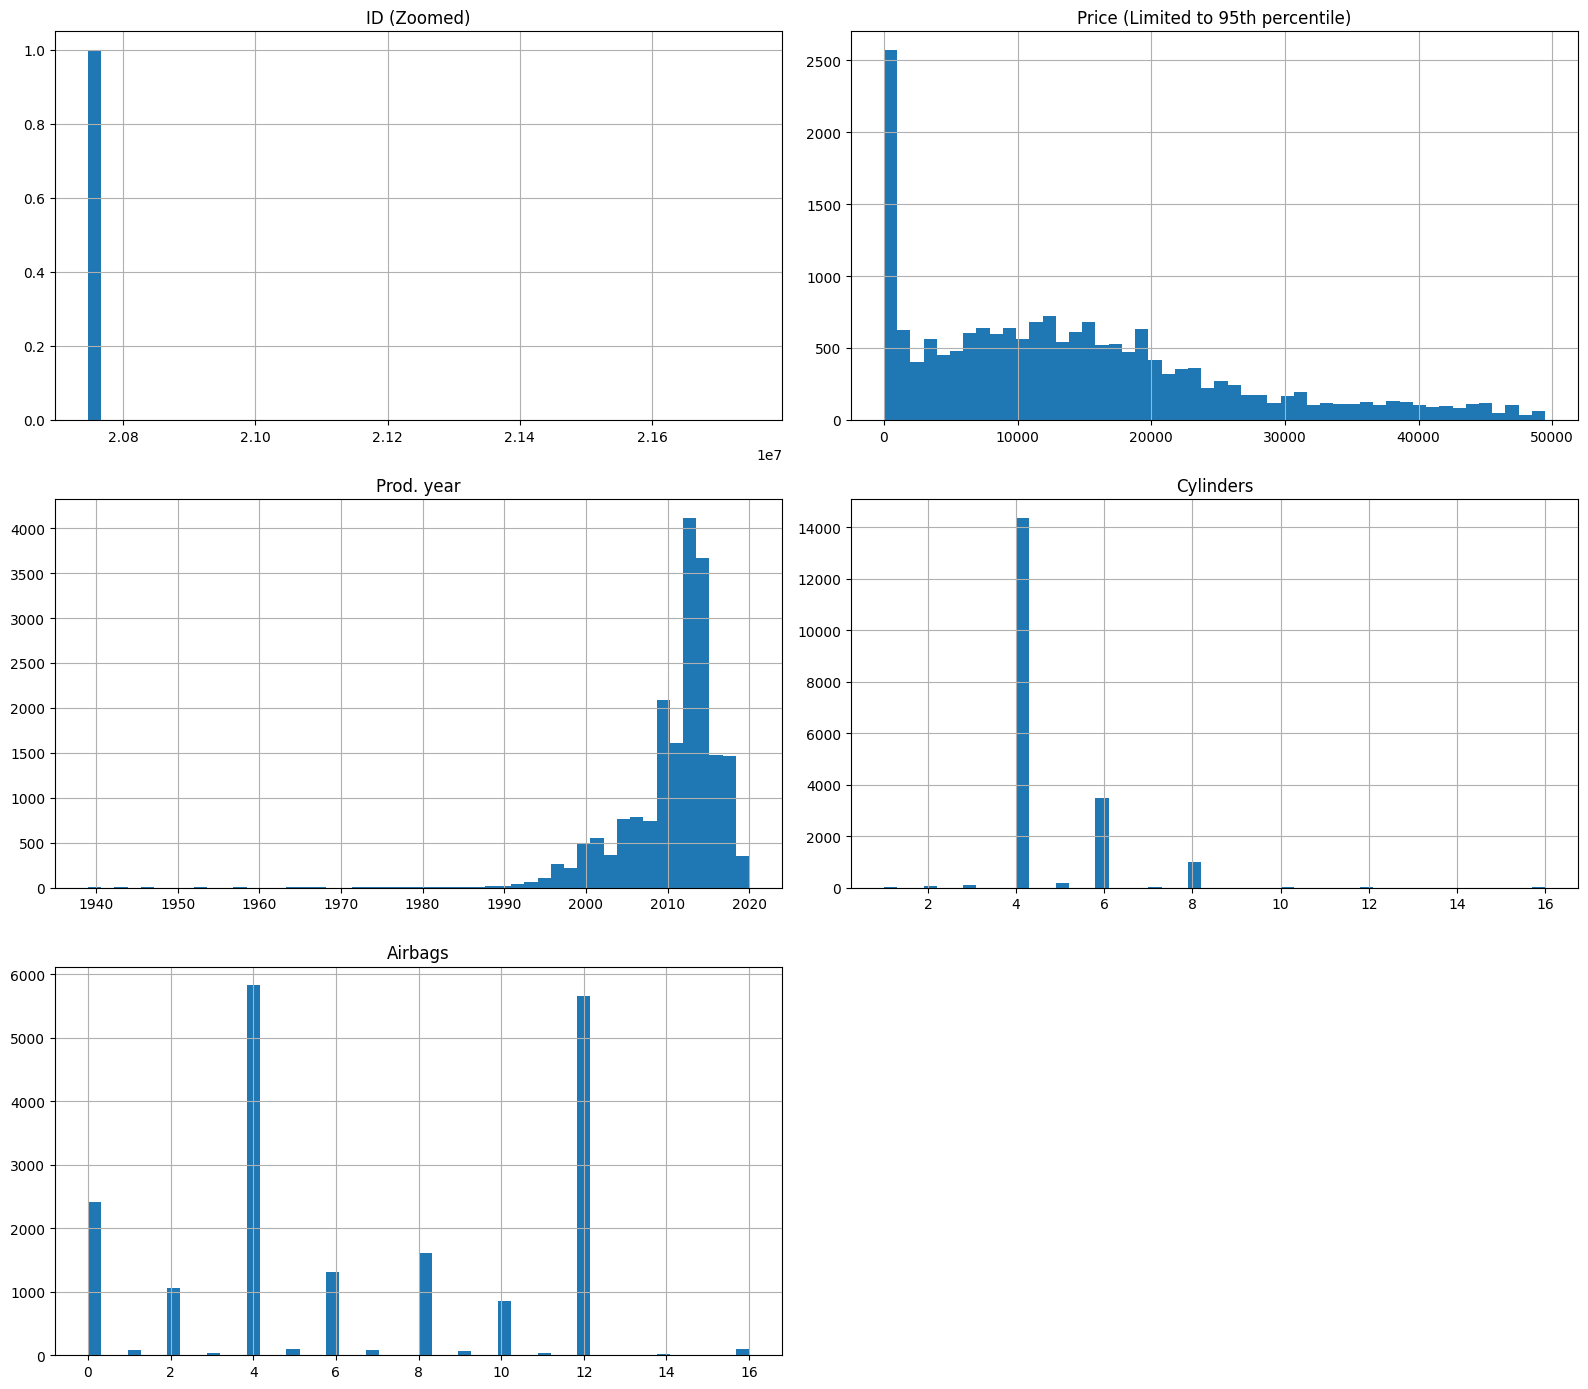

In [5]:
import matplotlib.pyplot as plt

# Plotar histogramas ajustados para tornar "ID" e "Price" mais compreensíveis
fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# Alterando a variável de "columns" para "Columns"
Columns = ['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']
data = df[Columns]

for i, column in enumerate(Columns):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    if column == 'ID':
        ax.hist(data[column], bins=50, range=(data['ID'].min(), data['ID'].min() + 1e6))
        ax.set_title(f'{column} (Zoomed)')
    elif column == 'Price':
        ax.hist(data[column], bins=50, range=(0, data['Price'].quantile(0.95)))
        ax.set_title(f'{column} (Limited to 95th percentile)')
    else:
        ax.hist(data[column], bins=50)
        ax.set_title(column)

    ax.grid()

# Remover subplot vazio (se houver número ímpar de gráficos)
if len(Columns) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()


## Descrição do Dataset

O dataset inclui as seguintes colunas principais:

- **Price**: Preço do carro (variável alvo).
- **Levy**: Taxa associada ao veículo.
- **Manufacturer**: Fabricante do veículo.
- **Model**: Modelo do carro.
- **Prod. year**: Ano de fabricação.
- **Category**: Categoria do carro (Jeep, Hatchback, etc.).
- **Fuel type**: Tipo de combustível (Petrol, Hybrid, etc.).
- **Engine volume**: Volume do motor em litros.
- **Mileage**: Quilometragem (km).
- **Cylinders**: Número de cilindros.
- **Gear box type**: Tipo de câmbio (Automatic, Tiptronic, etc.).
- **Drive wheels**: Tipo de tração (4x4, Front, etc.).
- **Color**: Cor do veículo.
- **Airbags**: Número de airbags.

O dataset possui também 19237 linhas

---

Inicialmente, podemos dizer que o dataset é bem estruturado e com isso, podemos iniciar uma análise inicial.

Criando uma copia e iniciando a exploração incial:

- Primeiramente, criamos uma cópia do dataframe chamada "df_exp"
- Depois, removemos a coluna ID pois se torna irrelevante para o que queremos prever aqui
- Criamos uma variável de faixas de preço chamada "price_category" que servirá para a estratificação em faixas de preços que iremos fazer

In [6]:
# Ajustando o código para usar "df_exp" ao invés de "df_exploracao"

# Criar uma cópia do dataset para exploração
df_exp = df.copy()

# Remover a coluna ID, pois não é relevante para a predição
if 'ID' in df_exp.columns:
    df_exp.drop('ID', axis=1, inplace=True)

# Convertendo a coluna 'Mileage' para um formato numérico (removendo ' km')
df_exp["Mileage"] = df_exp["Mileage"].str.replace(" km", "").astype(float)

# Criar uma variável de faixas de preço para estratificação
df_exp["price_category"] = pd.cut(df_exp["Price"],
                                  bins=[0, 5000, 15000, 30000, 50000, float('inf')],
                                  labels=[1, 2, 3, 4, 5])  # 5 categorias de preço


Dividindo agora, a cópia do dataset em treino e teste

In [7]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Criando um split estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Dividir os dados mantendo a proporção das categorias de preço
for train_index, test_index in split.split(df_exp, df_exp["price_category"]):
    strat_train_set = df_exp.loc[train_index]
    strat_test_set = df_exp.loc[test_index]

# Remover a coluna de categorização após o split
strat_train_set = strat_train_set.drop("price_category", axis=1)
strat_test_set = strat_test_set.drop("price_category", axis=1)

# Exibir a distribuição das faixas de preço no treino e teste
print("Distribuição de preços no conjunto de treino:")
print(strat_train_set["Price"].value_counts())

print("\nDistribuição de preços no conjunto de teste:")
print(strat_test_set["Price"].value_counts())




Distribuição de preços no conjunto de treino:
Price
470      226
15681    223
14113    206
392      202
314      192
        ... 
11900      1
31650      1
31245      1
60684      1
46891      1
Name: count, Length: 2066, dtype: int64

Distribuição de preços no conjunto de teste:
Price
15681    57
10976    51
7840     51
12544    50
470      48
         ..
16041     1
36539     1
36692     1
43000     1
16408     1
Name: count, Length: 978, dtype: int64


## Visualizando os Dados

Tipos de atributos

In [8]:
strat_train_set.dtypes

,0
Price,int64
Levy,object
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,object
Mileage,float64


Estudo dos Atributos e Suas Propriedades

| **Atributo**          | **Tipo**                | **Propriedades**                                      |
|------------------------|-------------------------|------------------------------------------------------|
| **Price**             | Numérico (`int`), bounded | Variável de saída (target).                          |
| **Levy**              | Texto ou categórico     | Pode conter valores ausentes ou não numéricos.       |
| **Manufacturer**      | Categórico              | Marca do carro (nominal).                            |
| **Model**             | Texto ou categórico     | Nome do modelo do carro.                             |
| **Prod. year**        | Numérico (`int`), bounded | Ano de produção.                                     |
| **Category**          | Categórico              | Tipo de carro (ex.: SUV, Sedan).                     |
| **Leather interior**  | Categórico binário      | Indica presença de interior de couro.                |
| **Fuel type**         | Categórico              | Tipo de combustível (ex.: gasolina, diesel).         |
| **Engine volume**     | Texto ou numérico       | Inclui valores como "2.0" ou "3.5 Turbo".            |
| **Mileage**           | Texto estruturado       | Quilometragem (ex.: "150,000 km").                   |
| **Cylinders**         | Numérico (`float`), bounded | Número de cilindros.                                 |
| **Gear box type**     | Categórico              | Tipo de transmissão (ex.: manual, automático).       |
| **Drive wheels**      | Categórico              | Tipo de tração (ex.: traseira, AWD).                 |
| **Doors**             | Texto ou categórico     | Número de portas.                                    |
| **Wheel**             | Categórico binário      | Posição do volante (ex.: "Left", "Right").           |
| **Color**             | Categórico              | Cor do carro.                                        |
| **Airbags**           | Numérico (`int`), bounded | Quantidade de airbags.                               |



% de valores ausentes

In [9]:
valores_ausentes = strat_train_set.isnull().mean() * 100
print(valores_ausentes)

Price               0.0
Levy                0.0
Manufacturer        0.0
Model               0.0
Prod. year          0.0
Category            0.0
Leather interior    0.0
Fuel type           0.0
Engine volume       0.0
Mileage             0.0
Cylinders           0.0
Gear box type       0.0
Drive wheels        0.0
Doors               0.0
Wheel               0.0
Color               0.0
Airbags             0.0
dtype: float64


Agora vamos realizar uma análise da coluna 'Price'

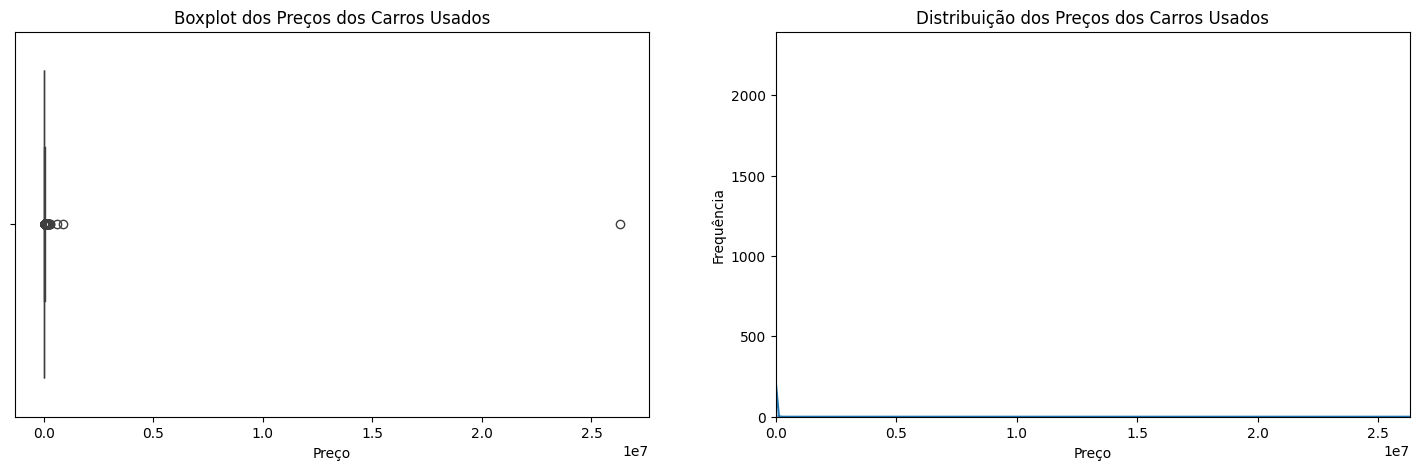

In [10]:
# Importar bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Analisar a distribuição da coluna 'Price'
plt.figure(figsize=(18, 5))

# Histograma da distribuição dos preços
plt.subplot(1, 2, 2)
sns.histplot(strat_train_set['Price'], kde=True)
plt.title('Distribuição dos Preços dos Carros Usados')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.xlim(0, strat_train_set['Price'].max())

# Boxplot dos preços
plt.subplot(1, 2, 1)
sns.boxplot(x='Price', data=strat_train_set)
plt.title('Boxplot dos Preços dos Carros Usados')
plt.xlabel('Preço')

# Mostrar os gráficos
plt.show()


agrupando agora as marcas de carro com suas categorias

In [11]:
# Escolher um atributo para agrupamento - Vamos agrupar os carros por 'Manufacturer' e 'Category'
df1 = strat_train_set.groupby(['Manufacturer', 'Category'], as_index=False).count()

# Contar quantas categorias cada fabricante possui no conjunto de treino
manufacturer_count = df1.Manufacturer.value_counts()

# Exibir os resultados
print(manufacturer_count)


Manufacturer
MERCEDES-BENZ    11
FORD             10
MITSUBISHI        9
VOLKSWAGEN        9
HYUNDAI           9
                 ..
LANCIA            1
LAND ROVER        1
PONTIAC           1
MASERATI          1
სხვა              1
Name: count, Length: 65, dtype: int64


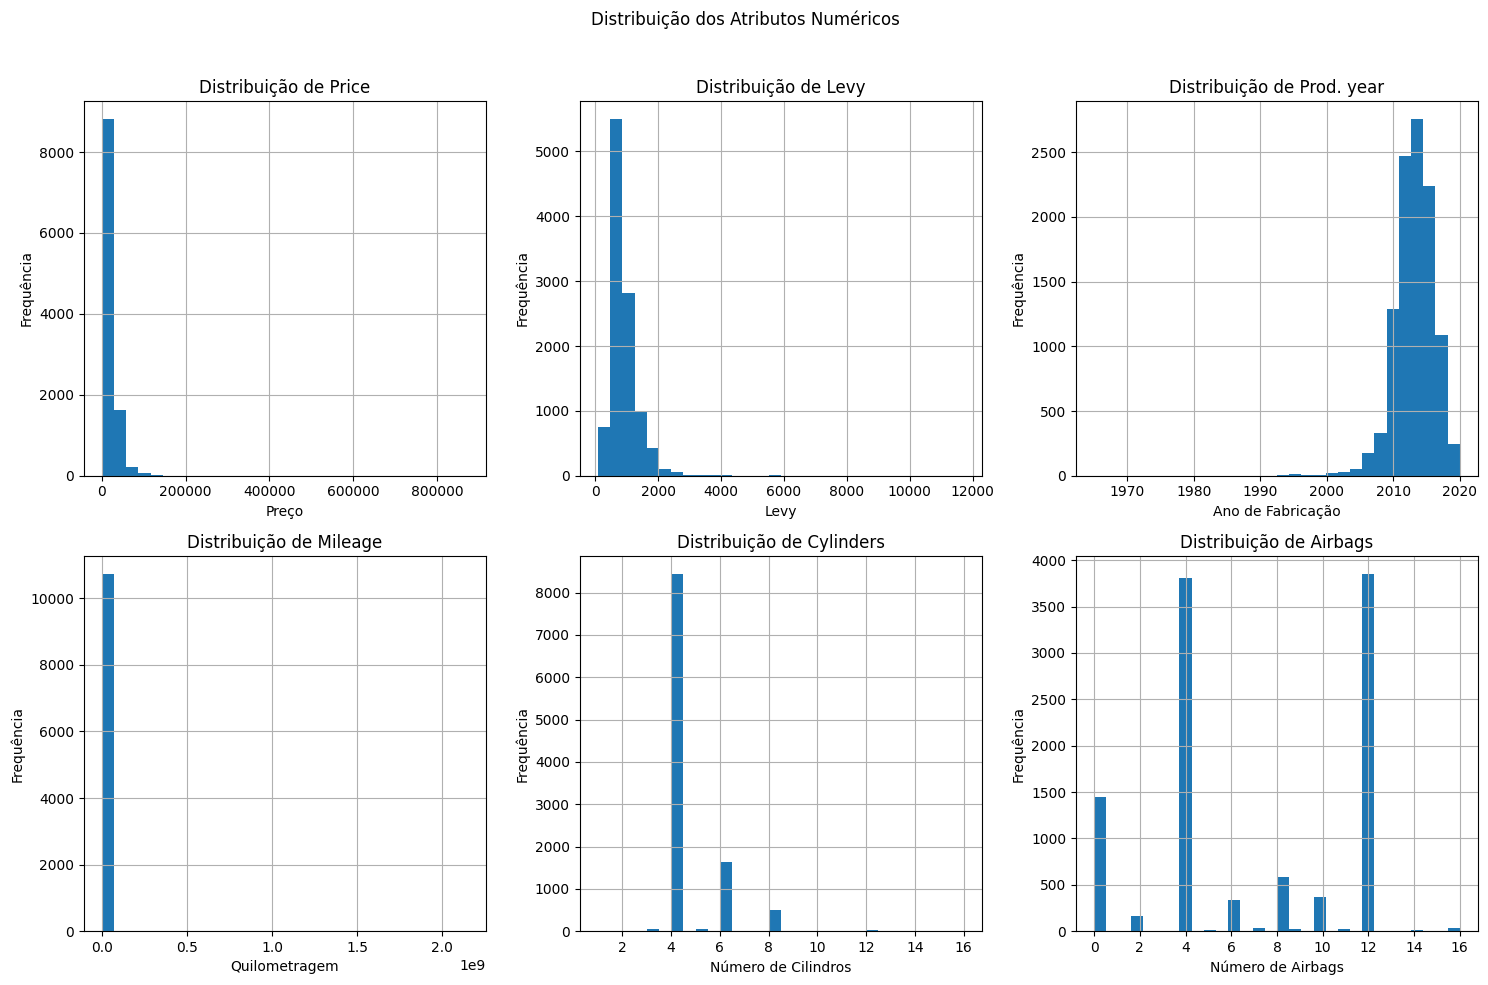

In [12]:
# Converter a coluna 'Levy' para numérico, tratando valores ausentes ou inválidos
strat_train_set['Levy'] = pd.to_numeric(strat_train_set['Levy'], errors='coerce')

# Selecionar apenas os atributos numéricos relevantes
df_numerico = strat_train_set[['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']]

# Remover possíveis valores NaN que foram introduzidos ao converter 'Levy'
df_numerico = df_numerico.dropna()

# Visualizar a distribuição dos dados para cada atributo numérico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df_numerico['Price'].hist(bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Price')
axes[0, 0].set_xlabel('Preço')
axes[0, 0].set_ylabel('Frequência')

df_numerico['Levy'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Levy')
axes[0, 1].set_xlabel('Levy')
axes[0, 1].set_ylabel('Frequência')

df_numerico['Prod. year'].hist(bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribuição de Prod. year')
axes[0, 2].set_xlabel('Ano de Fabricação')
axes[0, 2].set_ylabel('Frequência')

df_numerico['Mileage'].hist(bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Mileage')
axes[1, 0].set_xlabel('Quilometragem')
axes[1, 0].set_ylabel('Frequência')

df_numerico['Cylinders'].hist(bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Cylinders')
axes[1, 1].set_xlabel('Número de Cilindros')
axes[1, 1].set_ylabel('Frequência')

df_numerico['Airbags'].hist(bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribuição de Airbags')
axes[1, 2].set_xlabel('Número de Airbags')
axes[1, 2].set_ylabel('Frequência')

plt.suptitle('Distribuição dos Atributos Numéricos')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




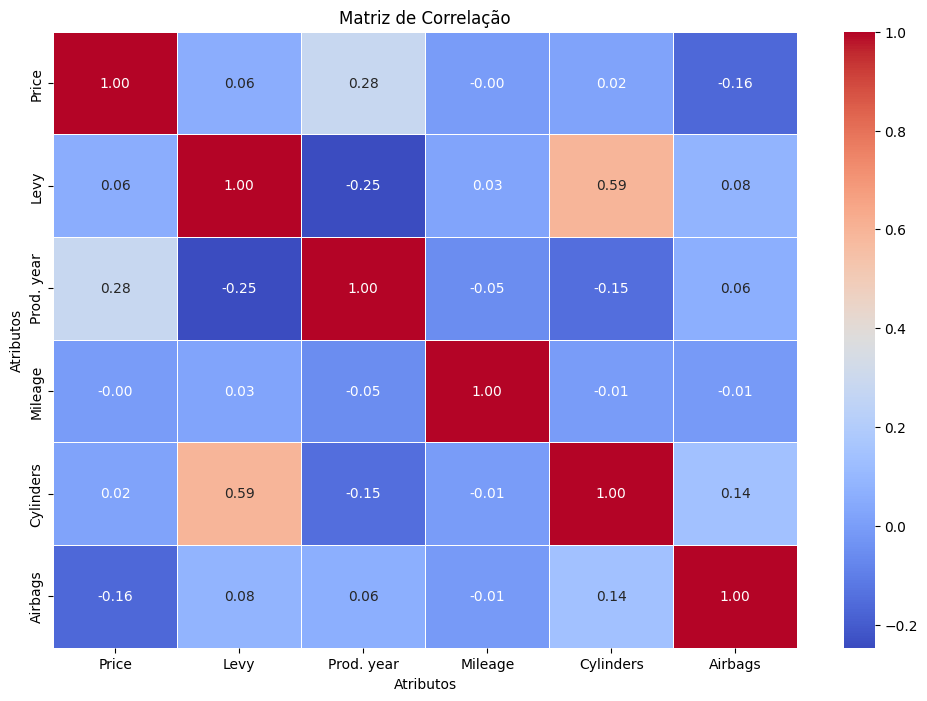

Pares de atributos com alta correlação:
            Price  Levy  Prod. year  Mileage  Cylinders  Airbags
Price         1.0   NaN         NaN      NaN        NaN      NaN
Levy          NaN   1.0         NaN      NaN        NaN      NaN
Prod. year    NaN   NaN         1.0      NaN        NaN      NaN
Mileage       NaN   NaN         NaN      1.0        NaN      NaN
Cylinders     NaN   NaN         NaN      NaN        1.0      NaN
Airbags       NaN   NaN         NaN      NaN        NaN      1.0


In [13]:
# Visualizar a correlação entre os atributos numéricos
correlacao = df_numerico.corr()
plt.figure(figsize=(12, 8))
plt.title('Matriz de Correlação')
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('Atributos')
plt.ylabel('Atributos')
plt.show()

# Identificar pares de atributos com alta correlação (acima de 0.8 ou abaixo de -0.8)
alta_correlacao = correlacao[(correlacao > 0.8) | (correlacao < -0.8)]
print("Pares de atributos com alta correlação:")
print(alta_correlacao)


Vamos relacionar o 'Prod. year' com 'Price', diferenciando por 'Fuel type' (Tipo de combustível)

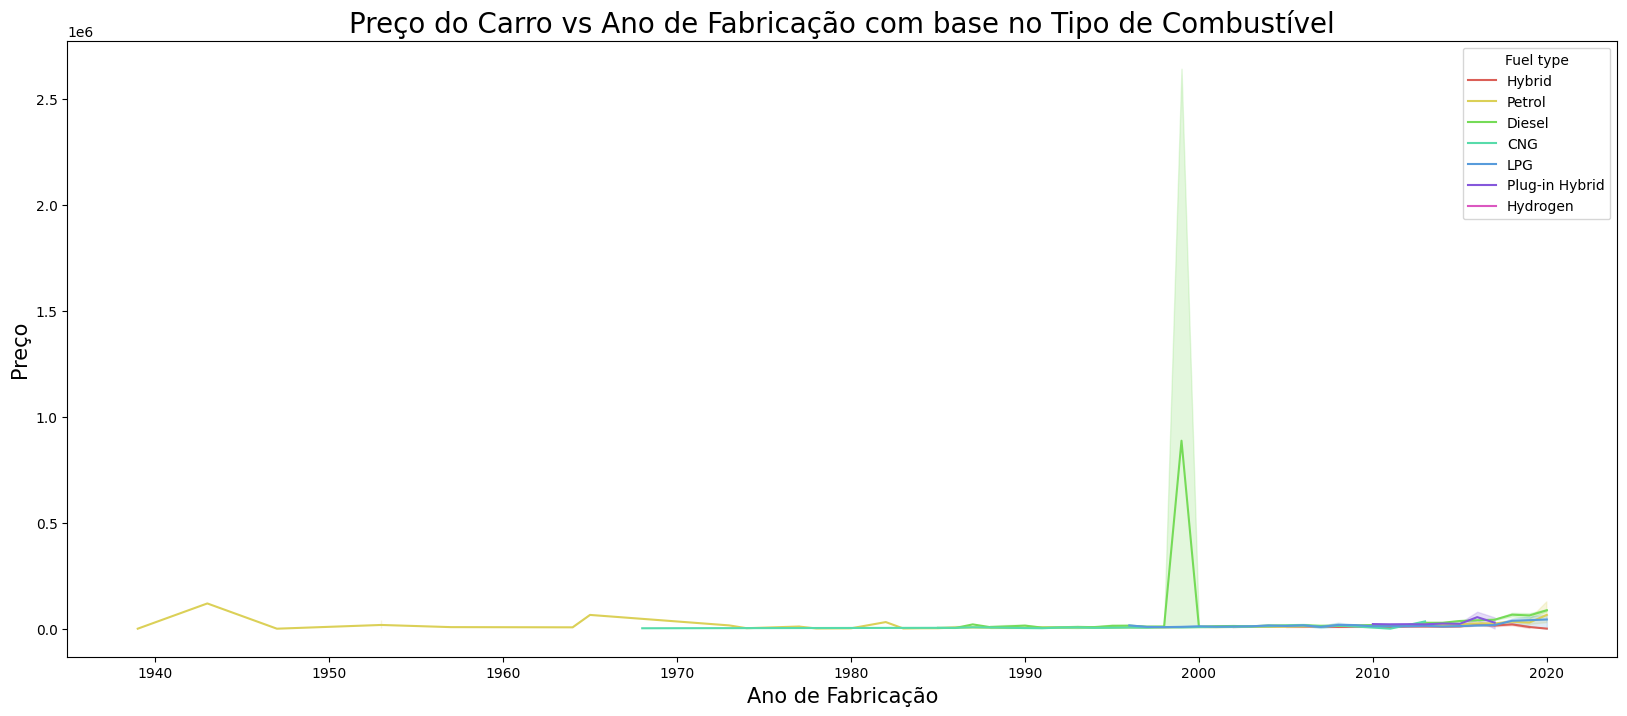

In [14]:
# Escolher atributos relevantes para uma visualização similar

plt.figure(figsize=(20, 8))

sns.lineplot(data=strat_train_set, x='Prod. year', y='Price', hue='Fuel type', palette='hls')

# Configurar título e rótulos
plt.title('Preço do Carro vs Ano de Fabricação com base no Tipo de Combustível', fontsize=20)
plt.xlabel('Ano de Fabricação', fontsize=15)
plt.ylabel('Preço', fontsize=15)

# Exibir o gráfico
plt.show()


## Preparação dos dados

In [15]:
#limpeza e substituiçao de valores

# Função para limpeza de dados e remoção de outliers
def clean_data(df):
    df = df.copy()  # Criar uma cópia para evitar alterações no original

    # Converter colunas numéricas para formato adequado
    #df["Mileage"] = df["Mileage"].str.replace(" km", "").astype(float)
    df["Levy"] = df["Levy"].replace("-", "0").astype(float)

    # Remover outliers evidentes
    df = df[df["Prod. year"] >= 1980]  # Removendo veículos fabricados antes de 1980

    # Remover outliers baseados no preço (assumindo valores extremamente altos como outliers)
    df = df[df["Price"] > 100]  # Remover preços irreais muito baixos
    df = df[df["Price"] < df["Price"].quantile(0.99)]  # Remover os 1% valores mais altos

    return df

# Aplicar a função de limpeza ao dataset original
df_exp = clean_data(df_exp)

In [16]:

# Função de pré-processamento para garantir a compatibilidade com o pipeline
def preprocessing(df):
    # Criar uma cópia para evitar modificar o dataset original
    df = df.copy()

    # Converter colunas binárias em valores numéricos
    df["Leather interior"] = df["Leather interior"].replace({'Yes': 1, 'No': 0}).astype(int)
    df["Wheel"] = df["Wheel"].replace({'Left wheel': 0, 'Right-hand drive': 1}).astype(int)

    # Converter "Doors" para numérico, garantindo que esteja como int
    df["Doors"] = df["Doors"].str.extract('(\d+)').astype(float).astype('Int64')

    # Separar "Engine volume" em duas colunas: volume e turbo
    df["Turbo"] = df["Engine volume"].str.contains("Turbo", na=False).astype(int)
    df["Engine volume"] = df["Engine volume"].str.replace(" Turbo", "", regex=True).astype(float)

    # Codificar "Manufacturer" e "Model" com LabelEncoder
    encoder_manufacturer = LabelEncoder()
    encoder_model = LabelEncoder()
    df["Manufacturer"] = encoder_manufacturer.fit_transform(df["Manufacturer"])
    df["Model"] = encoder_model.fit_transform(df["Model"])

    return df

# Aplicar a função de pré-processamento no conjunto de treino
df_preprocessed = preprocessing(df_exp)

# Definir atributos numéricos, categóricos e ordinais após pré-processamento
num_attribs = ["Levy", "Prod. year", "Mileage", "Cylinders", "Airbags"]
cat_attribs = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Color"]  # Mantendo categorias antes de OHE
ord_attribs = ["Doors", "Turbo"]

# Criar pipeline de pré-processamento ajustado
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),  # Normalização dos atributos numéricos
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),  # One-Hot Encoding para categóricos
    ("ord", OrdinalEncoder(categories=[[2, 3, 4, 5], [0, 1]]), ord_attribs),  # Codificação ordinal
])

# Aplicar o pipeline ao conjunto de treino
strat_train_set_prepared = full_pipeline.fit_transform(df_preprocessed)

# Criar um DataFrame com os dados transformados
strat_train_set_prepared_df = pd.DataFrame(
    strat_train_set_prepared.toarray(),  # Converter matriz esparsa em array denso
    columns=full_pipeline.get_feature_names_out()  # Obter os nomes das colunas geradas pelo pipeline
)

# Exibir os dados originais e os dados transformados
print(df_preprocessed.tail())
print('-/-' * 50)
print(strat_train_set_prepared_df.tail())


NameError: name 'LabelEncoder' is not defined

In [ ]:
# Criar uma máscara para ocultar a parte superior da matriz de correlação
mask = np.triu(np.ones_like(strat_train_set_prepared_df.corr(), dtype=bool))

plt.figure(figsize=(30, 30))

# Plotar a matriz de correlação
sns.heatmap(
    strat_train_set_prepared_df.corr(),
    mask=mask,
    annot=True,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='RdBu_r',
    linewidths=0.5,
    fmt='.2f',
    annot_kws={"size": 10}
)

# Configurar título e rótulos
plt.title('Matriz de Correlação do Dataset Preprocessado', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.show()


Porém, a correlação é uma boa métrica para relacionamento linear, mas não destaca os não lineares. Para isso, usamos informações mútuas, por isso usamos a Medição de Informação Mútua (MI) que ajuda a identificar quais variáveis independentes (features) têm maior relevância ou dependência com a variável dependente (target). Isso é útil para seleção de features, onde queremos escolher as variáveis mais informativas para o modelo. podendo ela capturar tanto relações lineares quanto não lineares entre as variáveis.

Para interpretá-la:

A MI é sempre não negativa e varia de 0 a ∞.
MI = 0: Indica que não há dependência entre a feature e o target. A feature não fornece nenhuma informação sobre o target.
MI > 0: Indica que há alguma dependência entre a feature e o target. Quanto maior o valor, maior a dependência.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Função para calcular a Medição de Informação Mútua (MI)
def make_mi_scores(X, y):
    # Fazer uma cópia para evitar alterações no dataset original
    X = X.copy()

    # Transformar colunas categóricas em numéricas usando factorize()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    # Criar uma lista booleana para identificar os atributos discretos
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]

    # Calcular os scores de Informação Mútua
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)

    # Transformar os scores em uma série do pandas
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

# Criar uma cópia do dataset preprocessado e definir a variável alvo (preço)
X = df_preprocessed.copy()
y = X.pop("Price")  # Remover "Price" do conjunto de features e usá-lo como target

# Calcular os MI Scores
mi_scores = make_mi_scores(X, y)

# Exibir os scores ordenados
print(mi_scores.sort_values(ascending=False))


# **Análise das Features Mais Informativas na Predição de Preço de Carros Usados**

## **Features Mais Informativas:**
- **price_category (1.431599):** A categorização do preço é a variável mais informativa, mostrando uma forte relação com o valor final dos veículos.
- **Model (0.953173):** O modelo do carro tem uma grande influência no preço, pois diferentes modelos da mesma marca podem apresentar grande variação de valor.
- **Mileage (0.904661):** A quilometragem rodada pelo veículo tem um impacto direto no preço, com carros menos rodados geralmente sendo mais valorizados.
- **Levy (0.850806):** A taxa associada ao veículo também apresenta uma alta correlação, possivelmente refletindo custos extras que impactam o preço final.
- **Airbags (0.455723):** A presença de airbags afeta o valor do carro, pois veículos com mais recursos de segurança tendem a ser mais valorizados.

## **Features Moderadamente Informativas:**
- **Prod. year (0.425425):** O ano de fabricação influencia o preço, pois veículos mais novos geralmente custam mais.
- **Manufacturer (0.407132):** A marca do carro tem um impacto considerável, pois algumas são mais valorizadas no mercado de revenda.
- **Engine volume (0.377807):** O volume do motor tem uma influência relevante, com motores maiores e mais potentes geralmente elevando o preço do veículo.
- **Fuel type (0.221161):** O tipo de combustível afeta o preço, pois carros elétricos e híbridos costumam ser mais caros que os convencionais a gasolina ou diesel.
- **Gear box type (0.201598):** O tipo de câmbio também tem um impacto moderado, com veículos automáticos geralmente mais valorizados.

## **Features Menos Informativas:**
- **Category (0.169512):** A categoria do veículo (SUV, Sedan, Hatchback, etc.) influencia o preço, mas em menor grau.
- **Leather interior (0.149517):** A presença de interior de couro tem uma influência menor sobre o preço do carro.
- **Drive wheels (0.124757):** O tipo de tração (dianteira, traseira, 4x4) tem um impacto pequeno no valor do veículo.
- **Color (0.122966):** A cor do veículo tem pouca influência no preço final, embora algumas cores sejam mais populares.
- **Cylinders (0.105691):** O número de cilindros do motor apresenta uma baixa relação com o preço do veículo.
- **Wheel (0.065381):** A posição do volante (esquerda/direita) tem pouca ou nenhuma influência no preço.
- **Turbo (0.051165):** A presença de turbo no motor tem um impacto mínimo no preço final do carro.
- **Doors (0.014662):** O número de portas do veículo é a variável menos informativa, sem relação significativa com o preço.



In [ ]:
# Selecionar as top 10 features mais informativas
top_10_features = mi_scores.head(10)
print("Top 10 features mais informativas:\n", top_10_features)

# Filtrar o DataFrame original para incluir apenas essas features
selected_features = top_10_features.index
X_selected = X[selected_features]